# Comparison using user input to select two states/territories

In [13]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import sys

In [14]:
#import data from StatesCleaned.csv
states_data = pd.read_csv('StatesCleaned.csv')
states_data = states_data.drop('Unnamed: 0',axis=1)

#output a sample of the imported dataframe
states_data.head()

,State,Population,Vaccination Ratio,Weekly New Cases (per 100k),Infection Rate,Cases,Deaths,Hospital Beds,Covid ICU Usage
0,AK,731545,0.725,54.3,1.04,300238,1390,1860.0,35.0
1,AL,4903185,0.647,85.4,1.15,1546720,21129,13416.0,310.0
2,AR,3017804,0.694,115.1,1.23,970396,12587,7367.0,287.0
3,AZ,7278717,0.767,178.4,1.26,2336206,31751,15059.0,1113.0
4,CA,39512223,0.840,128.7,1.22,11540816,99932,63802.0,4540.0


In [15]:
#create a function to prompt for user input
def prompt():
    #ask user for which two states to compare
    state1 = input("Enter the two-letter abbreviation of the first state you'd like to compare: ")
    state2 = input("Enter the two-letter abbreviation of the second state you'd like to compare: ")

    #create list of selectable metrics (from the dataframe columns)
    metrics_list = ''
    index = 1
    for metric_name in states_data.columns[2:]:
        metrics_list = metrics_list+str(index)+': '+str(metric_name)+',\n' 
        index+=1
        
    #ask user for desired comparison metric
    metric_index = input(f"Select the metric (type the number) you'd like to compare {state1} and {state2} on: "+metrics_list)

    #return user input as a list
    return [state1,state2,metric_index]

In [22]:
#prompt user and check for input errors
while True:
    try:
        inputs = prompt()
        #check if metric index is within bounds
        column_name = states_data.columns[int(inputs[2])+1]
        #boolean evaluation for correct state abbreviations
        state_check = (states_data.loc[states_data['State']==inputs[0]].any().any()) and (states_data.loc[states_data['State']==inputs[1]].any().any())
        if ~state_check:
            raise Exception
    except:
        #if any input is incorrectly formatted (not two-letter abbreviation, or not a possible column number), retry input
        print('Those inputs were not accepted. Retrying... ')
    else:
        #if inputs are acceptable, move on
        print('Inputs accepted...')
        break


Those inputs were not accepted. Retrying... 
Those inputs were not accepted. Retrying... 
Those inputs were not accepted. Retrying... 
Those inputs were not accepted. Retrying... 
Those inputs were not accepted. Retrying... 
Those inputs were not accepted. Retrying... 
Inputs accepted...


# This code creates the desired visualization from the user's input
After taking two state abbreviations and a selected metric (column) from the user, a graph comparing the stats for that metric is created.

c:\Users\Derrick\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


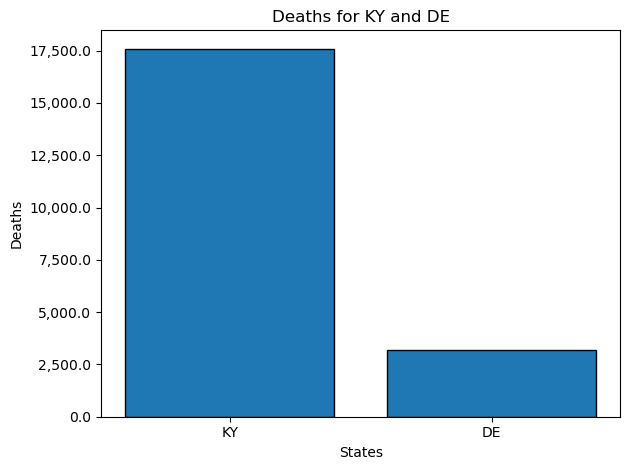

In [21]:
#access the requested data in the dataframe and present it in a dual bar graph
x = [inputs[0], inputs[1]]
y = [states_data.loc[states_data['State']==inputs[0]][column_name].values[0],states_data.loc[states_data['State']==inputs[1]][column_name].values[0]]

#create visualization, set attributes, and display
plt.figure(facecolor='white')
plt.bar(x,y,edgecolor='black')
plt.xlabel('States')
plt.ylabel(column_name)
initial_yticks = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in initial_yticks])
plt.title(f'{column_name} for {inputs[0]} and {inputs[1]}')
plt.tight_layout()
plt.savefig('singlecomparison.png')
plt.show()

# This next block takes the same states from the earlier input, and plots ALL of the metrics
This block achieves this using a single loop, standardizing the plots. This results in a less-than-ideal representation/scaling of the graphs side-by-side, but completes this process with less code than individualized/specific data parsing.

c:\Users\Derrick\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\Users\Derrick\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\Users\Derrick\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\Users\Derrick\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\Users\Derrick\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\Users\Derrick\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\Users\Derrick\anaconda3\e

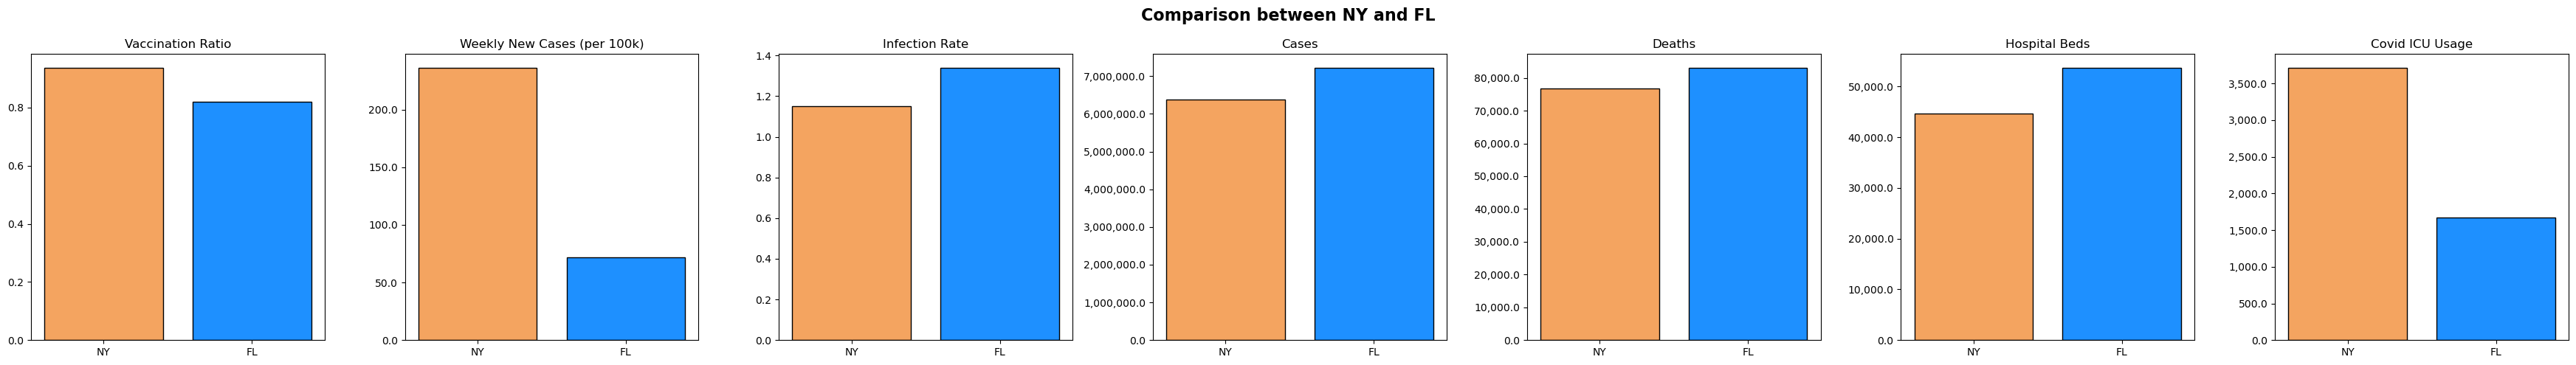

In [18]:
#compare ALL metrics for chosen states
x = [inputs[0], inputs[1]]
column_index = 2

#create visualization and set attributes
tuple_axs = ('ax1','ax2','ax3','ax4','ax5','ax6','ax7')
fig, tuple_axs = plt.subplots(1,7, sharex = True)
fig.set_facecolor('white')
fig.suptitle(f'Comparison between {inputs[0]} and {inputs[1]}', fontsize=16, fontweight='bold')
fig.set_size_inches(35,5)

# loop through all metrics and create a standardized plot for each
for ax in tuple_axs:
    #retrieve data for each metric
    column_name = states_data.columns[column_index]
    y = [states_data.loc[states_data['State']==inputs[0]][column_name].values[0],states_data.loc[states_data['State']==inputs[1]][column_name].values[0]]
    
    #create plot, set attributes
    ax.bar(x,y,edgecolor='black', color = ['sandybrown','dodgerblue'])
    ax.set_ylabel = states_data.columns[column_index]
    initial_yticks = ax.get_yticks()
    ax.set_yticklabels(['{:,.1f}'.format(x) for x in initial_yticks])
    ax.set_title(f'{column_name}')

    #increment index tracker
    column_index += 1

#display graphic
fig.tight_layout()
plt.savefig('allmetricscomparison.png')
plt.show()